### ensumble

In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [5]:
test = pd.read_csv('../inputs/test.csv')
print(test.shape)

(8360, 11)


In [13]:
lgbm_out = pd.read_csv('../outputs/submission_lgbm.csv').rename(columns={'Global_Sales': 'lgbm'})
cat_out = pd.read_csv('../outputs/submission_cat.csv').rename(columns={'Global_Sales': 'cat'})
print(lgbm_out.shape)
print(cat_out.shape)

(8360, 1)
(8360, 1)


In [14]:
ensumble = pd.concat([lgbm_out, cat_out], axis=1)
ensumble.corr()

,lgbm,cat
lgbm,1.00000,0.95026
cat,0.95026,1.00000


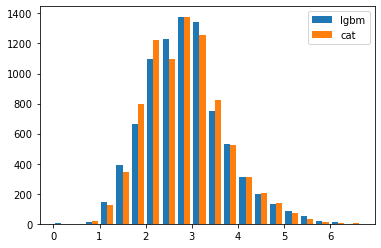

In [16]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
lgbm = np.log1p(ensumble['lgbm'])
cat = np.log1p(ensumble['cat'])
ax.hist([lgbm, cat], bins=20, label=['lgbm', 'cat'])
ax.legend()

In [10]:
ensumble['Global_Sales'] = (ensumble['lgbm']*0.7 + ensumble['cat']*0.3)
ensumble.drop(columns=['lgbm', 'cat'], inplace=True)
assert len(ensumble) == len(test)
ensumble.to_csv('../outputs/submission.csv', index=False)

print('- mean = {:.4f}'.format(ensumble['Global_Sales'].mean()))
print('- max = {:.4f}'.format(ensumble['Global_Sales'].max()))

- mean = 25.9207
- max = 753.1347
